In [1]:
# general import
import os 
import sys
import glob
import json
import scipy
import cortex
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.metrics import r2_score


# GLMsingle
from glmsingle.glmsingle import GLM_single
from glmsingle.glmsingle import getcanonicalhrflibrary
from glmsingle.utils.squish import squish 


# Nilearn
from nilearn.plotting import plot_design_matrix 
from nilearn.glm.first_level import make_first_level_design_matrix

# Personal imports
sys.path.append("{}/../../../analysis_code/utils".format(os.getcwd()))
from glm_utils import eventsMatrix, extract_predictions_r2
from surface_utils import load_surface, make_surface_image 

In [ ]:
# Set pycortex db and colormaps
cortex_dir = "{}/{}/derivatives/pp_data/cortex".format(main_dir, project_dir)
set_pycortex_config_file(cortex_dir)

In [17]:
main_dir = '/home/ulascombes/disks/meso_shared'
code_dir = '/home/ulascombes/disks/meso_H/projects'
slope_idx, intercept_idx, rvalue_idx, pvalue_idx, stderr_idx, \
    trs_idx, corr_pvalue_5pt_idx, corr_pvalue_1pt_idx = 0, 1, 2, 3, 4, 5, 6, 7


project_dir = 'RetinoMaps'
subject = 'sub-02'
run = 'run-02'
task = 'PurLoc'
hemi = 'hemi-L'

# Load data

In [6]:
pred_1_fn = '{}/{}/derivatives/pp_data/{}/fsnative/glm/glm_single_fit/{}_task-{}_{}_fmriprep_dct_avg_loo-1_glm-pred.func.gii'.format(main_dir, project_dir, subject, subject, task, hemi)
pred_2_fn = '{}/{}/derivatives/pp_data/{}/fsnative/glm/glm_single_fit/{}_task-{}_{}_fmriprep_dct_avg_loo-2_glm-pred.func.gii'.format(main_dir, project_dir, subject, subject, task, hemi)



In [7]:
pred_1_img, pred_1_data = load_surface(fn=pred_1_fn)
pred_2_img, pred_2_data = load_surface(fn=pred_2_fn)

In [8]:
bold_1_fn = '{}/{}/derivatives/pp_data/{}/fsnative/func/fmriprep_dct_loo_avg/{}_task-{}_{}_fmriprep_dct_avg_loo-1_bold.func.gii'.format(main_dir, project_dir, subject, subject, task, hemi)
bold_2_fn = '{}/{}/derivatives/pp_data/{}/fsnative/func/fmriprep_dct_loo_avg/{}_task-{}_{}_fmriprep_dct_avg_loo-2_bold.func.gii'.format(main_dir, project_dir, subject, subject, task, hemi)


In [9]:
bold_1_img, bold_1_data = load_surface(fn=bold_1_fn)
bold_2_img, bold_2_data = load_surface(fn=bold_2_fn)

In [13]:
stat_fn = '{}/{}/derivatives/pp_data/{}/fsnative/glm/glm_single_derivatives/{}_task-{}_{}_fmriprep_dct_avg_glm-stats_loo-median.func.gii'.format(main_dir, project_dir, subject, subject, task, hemi)



In [14]:
stat_img, stat_data = load_surface(fn=stat_fn)

# plot

In [45]:
# find best r2
np.nanargmax(stat_data[rvalue_idx,:])

24964

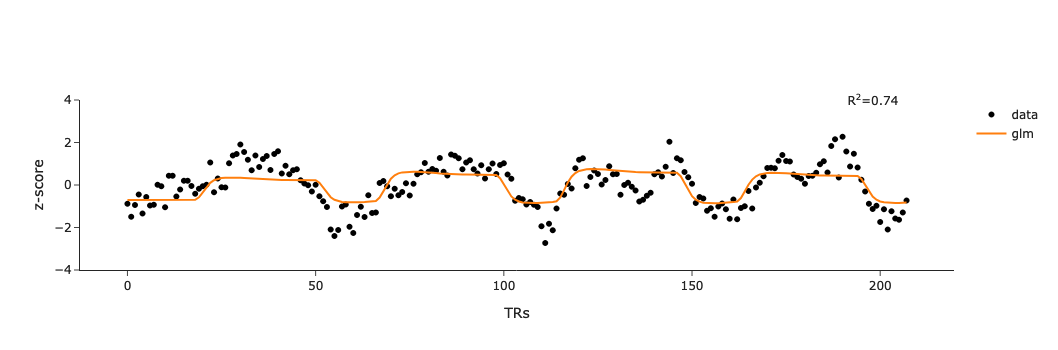

In [46]:
# plot best voxel for left hemisphere
vert_idx = 24964

fig1 = go.Figure()

# plot data time series
fig1.add_trace(go.Scatter(y=bold_1_data[:, vert_idx],
                         name='data', 
                         mode='markers', 
                          line=dict(color='black') 
                         ))

# plot pRF prediction
fig1.add_trace(go.Scatter(y=pred_2_data[:, vert_idx], 
                          name='glm'))


fig1.add_annotation(text='R<sup>2</sup>={:1.2f}'.format(stat_data[rvalue_idx, vert_idx]),  
                    x=198,  
                    y=4,
                    showarrow=False
                   )

fig1.update_layout(template='simple_white', 
                   # title = '{} vertex time series for {} noise model'.format(num_vert,noise_model_2), 
                   xaxis_title = 'TRs', 
                   yaxis_title = 'z-score', 
                   showlegend= True,
                   height=350, 
                   yaxis=dict(title_standoff=0))

# fig1.update_xaxes(range=[0,bold_data.shape[0]])
# fig1.update_xaxes(range=[0,50])

fig1.update_yaxes(range=[-4,4])


fig1.show()

Unable to init server: Could not connect: Connection refused
Failed to get connection
** (inkscape:3765453): CRITICAL **: 14:49:44.351: dbus_g_proxy_new_for_name: assertion 'connection != NULL' failed
** (inkscape:3765453): CRITICAL **: 14:49:44.351: dbus_g_proxy_call: assertion 'DBUS_IS_G_PROXY (proxy)' failed
** (inkscape:3765453): CRITICAL **: 14:49:44.351: dbus_g_connection_register_g_object: assertion 'connection != NULL' failed
** (inkscape:3765453): WARNING **: 14:49:44.572: Fonts dir '/usr/share/inkscape/fonts' does not exist and will be ignored.
Background RRGGBBAA: ffffff00
Area 0:0:2200.6:1024 exported to 2201 x 1024 pixels (96 dpi)


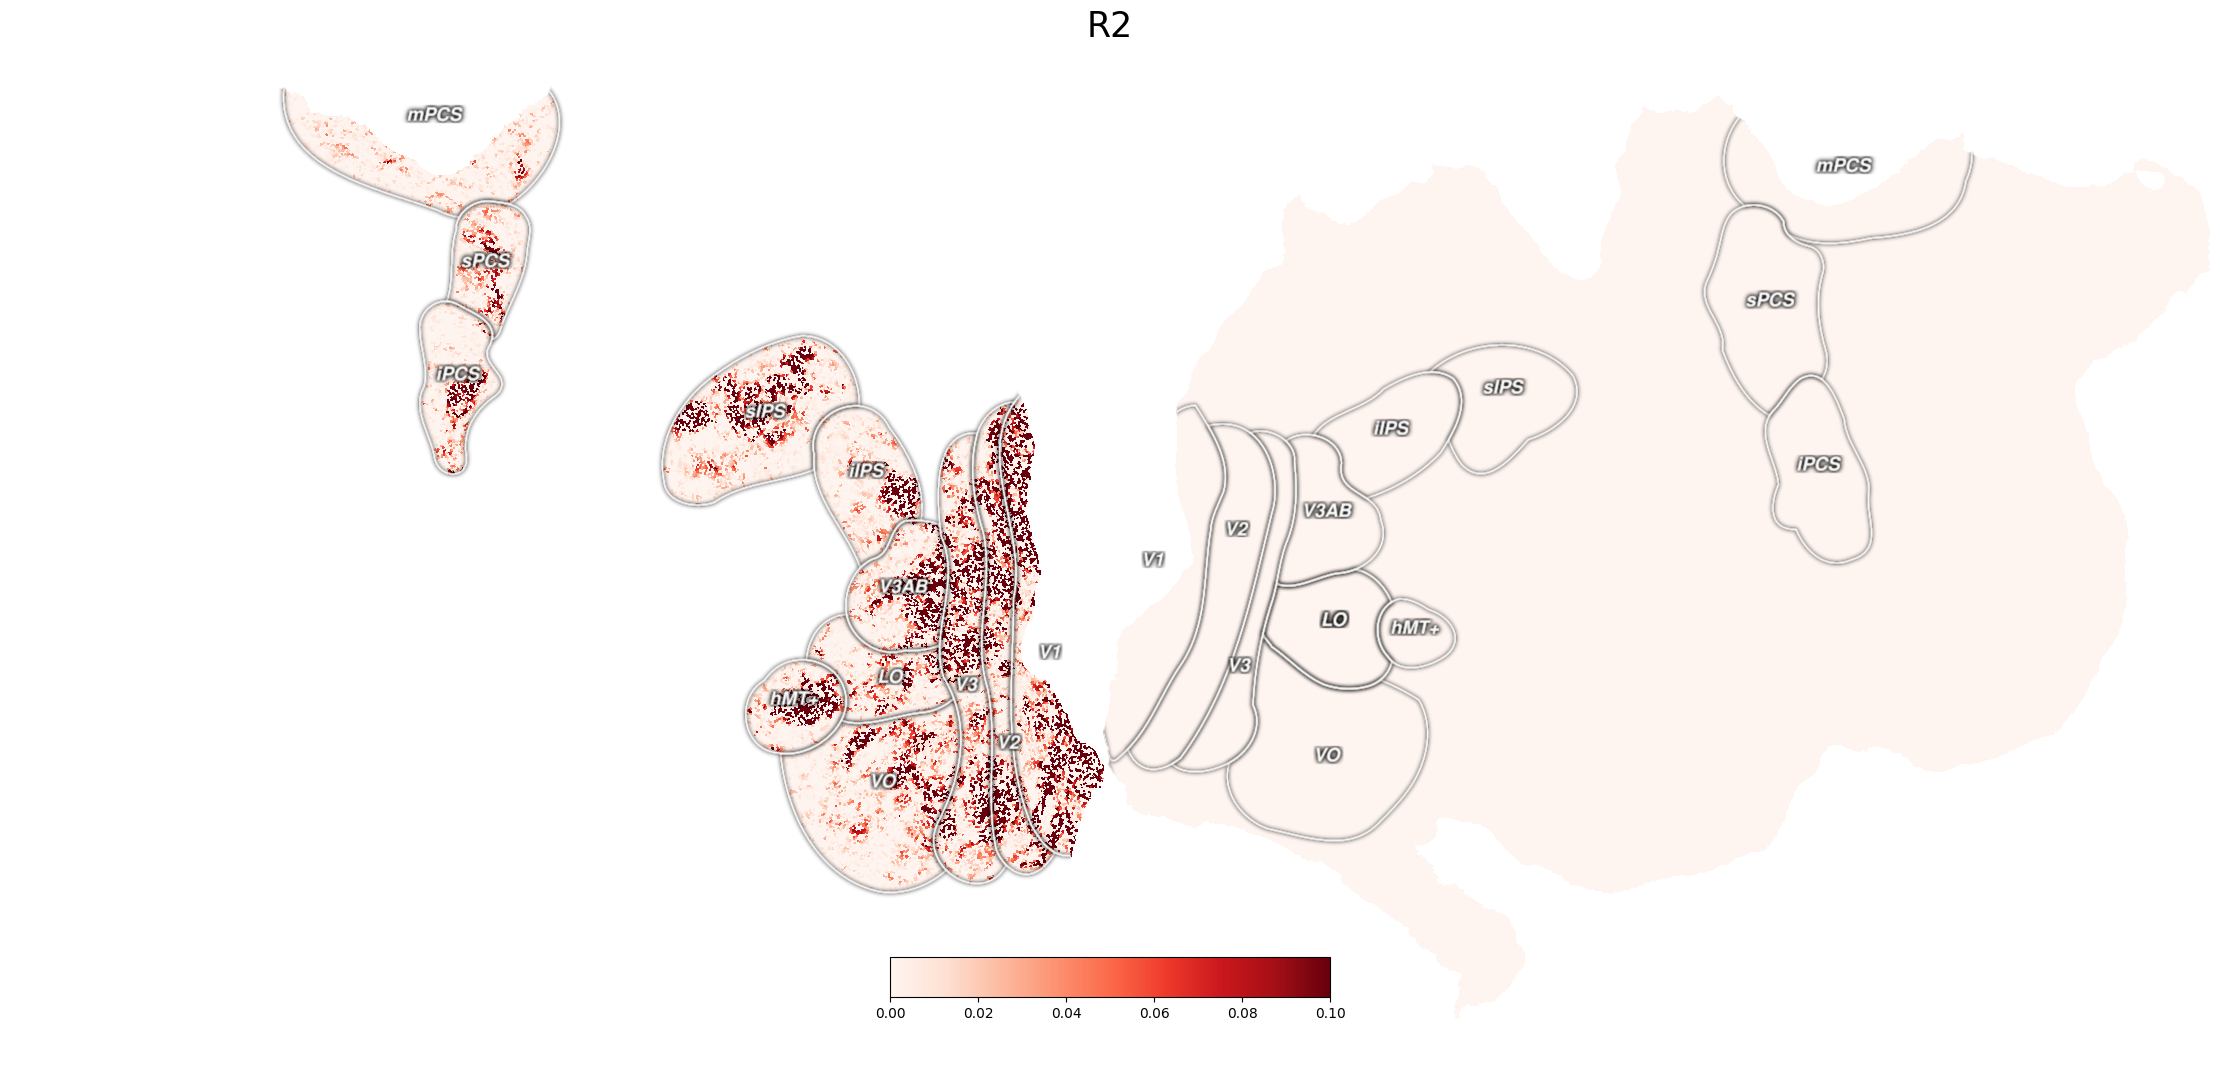

In [35]:
vertex_data = cortex.Vertex(stat_data[rvalue_idx,:]**2, subject, cmap='Reds', vmin=0, vmax=0.1)

cortex.quickshow(vertex_data, with_colorbar=True)
plt.title("R2", fontsize=25)
# plt.savefig('/Users/uriel/Downloads/mmp_atlas.pdf')
plt.show()

In [34]:
stat_data[rvalue_idx,:]

array([-0.3498966 , -0.36825794, -0.00541863, ...,         nan,
               nan,         nan], dtype=float32)